---
title: Glyphs
date: 2023-12-301
authors:
  - name: Sébastien Boisgérault
    email: Sebastien.Boisgerault@minesparis.psl.eu
    url: https://github.com/boisgera
    affiliations:
      - institution: Mines Paris - PSL University
        department: Institut des Transformation Numériques (ITN)
github: boisgera
license: CC-BY-4.0
open_access: true
---

## Glyph Representation

![](images/z.tldraw.png)

```{exercise} Glyph Skeleton

 1. Create a new tldraw document with a unique continuous short curve created with the draw tool (called in the sequel a *glyph*).

 2. Load the document in Python and extract from it the unique record of type `draw`.

 3. Build from this record the arrays `x` and `y` of the points coordinates that describe the curve.

    ⚠️ Make sure that you get the initial values `x[0]` and `y[0]` right!

 5. Plot the curve using an aspect ratio of 1 ; make sure that your conventions for the y axis match those of tldraw.

```

In [5]:
#1

In [6]:
#2
import json

with open('docs/curve.tldr', mode = 'r') as curve:
    jfile = json.loads(curve.read())

jfile['records'][6]

{'x': 251,
 'y': 226,
 'rotation': 0,
 'isLocked': False,
 'opacity': 1,
 'meta': {},
 'id': 'shape:IZQ4sFYHa-xMeSoqvrc1t',
 'type': 'draw',
 'props': {'segments': [{'type': 'free',
    'points': [{'x': 0, 'y': 0, 'z': 0.5},
     {'x': 1, 'y': -2, 'z': 0.5},
     {'x': 12, 'y': -10, 'z': 0.5},
     {'x': 46, 'y': -24, 'z': 0.5},
     {'x': 81, 'y': -34, 'z': 0.5},
     {'x': 132, 'y': -40, 'z': 0.5},
     {'x': 192, 'y': -42, 'z': 0.5},
     {'x': 242, 'y': -42, 'z': 0.5},
     {'x': 283, 'y': -39, 'z': 0.5},
     {'x': 310, 'y': -32, 'z': 0.5},
     {'x': 317, 'y': -26, 'z': 0.5},
     {'x': 317, 'y': -17, 'z': 0.5},
     {'x': 295, 'y': 0, 'z': 0.5},
     {'x': 239, 'y': 25, 'z': 0.5},
     {'x': 166, 'y': 54, 'z': 0.5},
     {'x': 71, 'y': 96, 'z': 0.5},
     {'x': 53, 'y': 104, 'z': 0.5},
     {'x': 22, 'y': 128, 'z': 0.5},
     {'x': 16, 'y': 141, 'z': 0.5},
     {'x': 13, 'y': 149, 'z': 0.5},
     {'x': 13, 'y': 154, 'z': 0.5},
     {'x': 19, 'y': 160, 'z': 0.5},
     {'x': 59, '

[0, 1, 12, 46, 81, 132, 192, 242, 283, 310, 317, 317, 295, 239, 166, 71, 53, 22, 16, 13, 13, 19, 59, 159, 294, 467, 626, 724, 763, 764]
[0, 2, 10, 24, 34, 40, 42, 42, 39, 32, 26, 17, 0, -25, -54, -96, -104, -128, -141, -149, -154, -160, -164, -164, -164, -164, -164, -164, -164, -165]


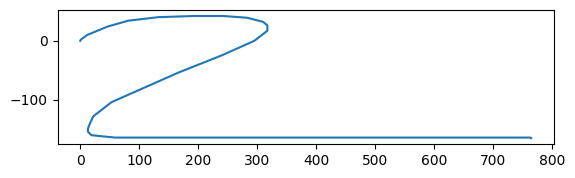

In [7]:
#3
import matplotlib.pyplot as plt

list_x = []
list_y = []

for i in range(len(jfile['records'][6]['props']['segments'][0]['points'])):
    list_x.append(jfile['records'][6]['props']['segments'][0]['points'][i]['x'])
    list_y.append(-jfile['records'][6]['props']['segments'][0]['points'][i]['y'])

print(list_x)
print(list_y)

plt.plot(list_x,list_y)

# Setting equal scales for the 2 axis
plt.gca().set_aspect('equal')

plt.show()

#plt.xlim(0,800)
#plt.ylim()

![](images/z-skeleton-only.jpg)

The curve that you have plotted only represents a "skeleton" of the glyph but not its thickness. 
The thickness itself is computed from an evaluation of the speed at which the pen travels (the faster the pen is, the smaller the curve is ; this is how the pen pressure is simulated).

```{exercise} Glyph Outline
 1. Make a new continuous curve that you draw during 6 seconds (the more precise the better ! I would advise you to use a stopwatch) ; try to move constantly when you draw the curve at first (for the initial 3 seconds) then faster (for the final 3 seconds). Then, extract the corresponding coordinates `x` and `y` in Python and make an informed guess on how these values are sampled from the "true" time-dependent curve.

 2. The `perfect-freehand` python package ports to Python the Javascript library used by tldraw to draw the curves contour. It is [available on pypi](https://pypi.org/project/perfect-freehand/) and [documented](https://bigbluebutton.github.io/perfect-freehand-python/). Use it to represent on the same matplotlib display the skeleton points and a corresponding contour.
```

![](images/z-outline.jpg)


In [8]:
#1
import json
import pprint

with open('docs/curve_6sec.tldr', mode='r') as crv:
    jcrv = json.loads(crv.read())

jpcrv = pprint.PrettyPrinter().pformat(jcrv)

#print(jpcrv)
#print(jcrv['records'][6])
print()
print(jcrv['records'][7])

#I suppose that the pressure is calculated from the space between two points. More precisely, 
#there should be a kind of clock, for example that tick every second, and if we and more or 
#less far from the last point, the pressure would be more or less high.


{'x': 678.8347107438017, 'y': 96.01652892561987, 'rotation': 0, 'isLocked': False, 'opacity': 1, 'meta': {}, 'id': 'shape:XH7tuSnS0mmDiqjzAgs-e', 'type': 'draw', 'props': {'segments': [{'type': 'free', 'points': [{'x': 0, 'y': 0, 'z': 0.5}, {'x': 1.65, 'y': 0, 'z': 0.5}, {'x': 2.48, 'y': 0, 'z': 0.5}, {'x': 4.13, 'y': 0, 'z': 0.5}, {'x': 4.96, 'y': -0.83, 'z': 0.5}, {'x': 6.61, 'y': -0.83, 'z': 0.5}, {'x': 7.44, 'y': -0.83, 'z': 0.5}, {'x': 9.09, 'y': -2.48, 'z': 0.5}, {'x': 9.92, 'y': -2.48, 'z': 0.5}, {'x': 10.74, 'y': -2.48, 'z': 0.5}, {'x': 11.57, 'y': -2.48, 'z': 0.5}, {'x': 12.4, 'y': -2.48, 'z': 0.5}, {'x': 13.22, 'y': -2.48, 'z': 0.5}, {'x': 14.05, 'y': -3.31, 'z': 0.5}, {'x': 14.88, 'y': -3.31, 'z': 0.5}, {'x': 15.7, 'y': -3.31, 'z': 0.5}, {'x': 16.53, 'y': -3.31, 'z': 0.5}, {'x': 17.36, 'y': -3.31, 'z': 0.5}, {'x': 18.18, 'y': -3.31, 'z': 0.5}, {'x': 19.01, 'y': -3.31, 'z': 0.5}, {'x': 19.83, 'y': -3.31, 'z': 0.5}, {'x': 21.49, 'y': -3.31, 'z': 0.5}, {'x': 22.31, 'y': -3.31,

In [9]:
#2
import perfect_freehand as pf


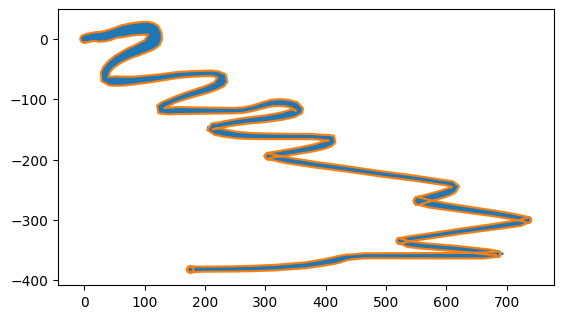

In [10]:
skeleton_x = []
skeleton_y = []

for i in range(len(jcrv['records'][7]['props']['segments'][0]['points'])):
    skeleton_x.append(jcrv['records'][7]['props']['segments'][0]['points'][i]['x'])
    skeleton_y.append(-jcrv['records'][7]['props']['segments'][0]['points'][i]['y'])

sxy = []

for i in range(len(skeleton_x)):
    sxy.append((skeleton_x[i],skeleton_y[i]))

#print(sxy) #all the points of the stroke

gs = pf.get_stroke(sxy)
#print(gs) 

plt.plot(skeleton_x,skeleton_y)

gsx = [g[0] for g in gs]
gsy = [g[1] for g in gs]
plt.plot(gsx, gsy)

# Setting equal scales for the 2 axis
plt.gca().set_aspect('equal')

plt.fill(gsx,gsy)
plt.show()

## Glyph Classification


![](images/glyphs-reference.png)




```{exercise} Glyph Collection
 1. Create a tldraw document that contains many small variations of the same glyph as depicted above. Pick a glyph of your chosing!
    Save it as `docs/glyphs.tldr`.
 
    ⚠️ If you have a ✍️ pen tablet, use it; otherwise you're probably better off using your 👆 finger on a tablet / mobile phone than a 🖱️ mouse to get a collection of similar glyphs.
 2. Draw all these glyph variants in matplotib ; translate them beforehand so that they have the same center of mass and are (mostly but not entirely) superimposed.
```

![](images/glyphs-superimposed.jpg)

In [11]:
#1

In [12]:
#2
with open('docs/glyphs.tldr', mode='r') as gly:
    glyphs = json.loads(gly.read())

#print(glyphs['records'][6]['y'])
#len(glyphs['records'])

for i in range(len(glyphs['records'])-5) :
    glyphs['records'][i+5]['x'] = 540
    glyphs['records'][i+5]['y'] = 450


Each glyph may have a different number of samples, so its hard to compare them directly. Additionally they may be a bit rough and could probably use a smoother and denser representation (with many more points).

```{exercise} Interpolation and Resampling
 1. Associate to any glyph represented by its coordinate a path $t \in [0, 1] \mapsto \mathbb{R}^2$ (as a Python function), using some "smooth" interpolation.
 
    **Hint:** use [`scipy.interpolate.interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html).
 
 2. Sample it uniformly to get exactly 1000 points.

```



In [13]:
import numpy as np
import scipy as spi
from scipy import interpolate
import matplotlib.pyplot as plt

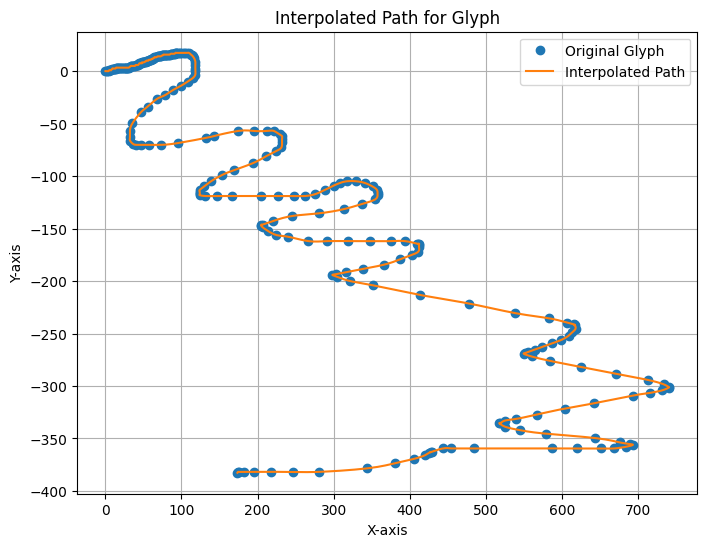

In [18]:
#For one glyph

# Creating an interpolation function for x and y coordinates
interp_x = spi.interpolate.interp1d(np.linspace(0, 1, len(skeleton_x)), skeleton_x, kind='cubic')
interp_y = spi.interpolate.interp1d(np.linspace(0, 1, len(skeleton_y)), skeleton_y, kind='cubic')

# Sampling the interpolation to obtain exactly 1000 points
t = np.linspace(0, 1, 1000)
x_sampled = interp_x(t)
y_sampled = interp_y(t)

# Plotting the sampled points
plt.figure(figsize=(8, 6))
plt.plot(skeleton_x, skeleton_y, 'o', label='Original Glyph')
plt.plot(x_sampled, y_sampled, '-', label='Interpolated Path')
plt.title('Interpolated Path for Glyph')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

```{exercise} Mean Glyph
 1. Use the set of resampled coordinates to compute the (resampled) "mean glyph" that averages the features of all glyphs. 
 2. Draw this glyph !
```

![](images/glyphs-mean.jpg)

In [35]:
#Taking the informations of one of the glyph

glyphs['records'][7]['props']['segments'][0]['points']
glyphs_x = []
glyphs_y = []

for i in range(len(glyphs['records'][7]['props']['segments'][0]['points'])):
    glyphs_x.append(glyphs['records'][7]['props']['segments'][0]['points'][i]['x'])
    glyphs_y.append(glyphs['records'][7]['props']['segments'][0]['points'][i]['y']*(-1))

print(glyphs_x)
print(glyphs_y)

[{'x': 0, 'y': 0, 'z': 0.5}, {'x': 1, 'y': -1, 'z': 0.5}, {'x': 4, 'y': -2, 'z': 0.5}, {'x': 8, 'y': -3, 'z': 0.5}, {'x': 30, 'y': -6, 'z': 0.5}, {'x': 40, 'y': -9, 'z': 0.5}, {'x': 74, 'y': -18, 'z': 0.5}, {'x': 105, 'y': -30, 'z': 0.5}, {'x': 138, 'y': -46, 'z': 0.5}, {'x': 160, 'y': -61, 'z': 0.5}, {'x': 174, 'y': -73, 'z': 0.5}, {'x': 180, 'y': -88, 'z': 0.5}, {'x': 181, 'y': -108, 'z': 0.5}, {'x': 181, 'y': -126, 'z': 0.5}, {'x': 176, 'y': -146, 'z': 0.5}, {'x': 166, 'y': -167, 'z': 0.5}, {'x': 157, 'y': -182, 'z': 0.5}, {'x': 150, 'y': -194, 'z': 0.5}, {'x': 139, 'y': -203, 'z': 0.5}, {'x': 135, 'y': -205, 'z': 0.5}, {'x': 133, 'y': -205, 'z': 0.5}, {'x': 127, 'y': -204, 'z': 0.5}, {'x': 120, 'y': -190, 'z': 0.5}, {'x': 110, 'y': -160, 'z': 0.5}, {'x': 99, 'y': -121, 'z': 0.5}, {'x': 95, 'y': -89, 'z': 0.5}, {'x': 95, 'y': -58, 'z': 0.5}, {'x': 95, 'y': -29, 'z': 0.5}, {'x': 99, 'y': -6, 'z': 0.5}, {'x': 101, 'y': 13, 'z': 0.5}, {'x': 103, 'y': 24, 'z': 0.5}, {'x': 103, 'y': 32, 

In [ ]:
#Verification

plt.plot(glyphs_x,glyphs_y)
plt.title('Verification of the glyph coordonates')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show

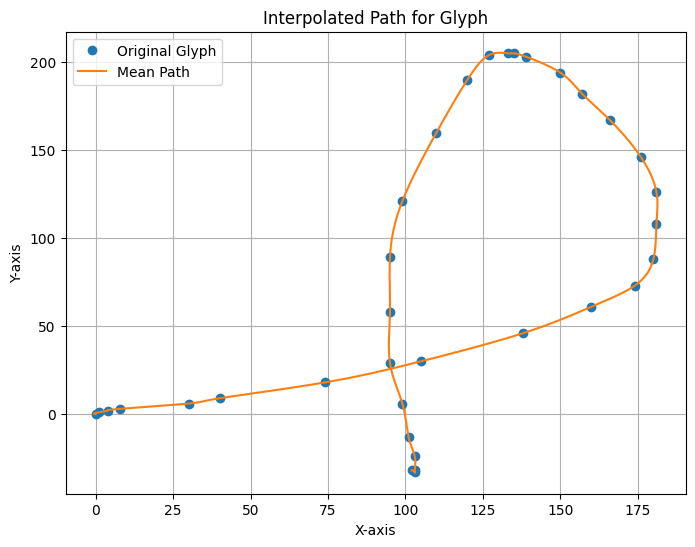

In [46]:
#Resampling

interp_x = spi.interpolate.interp1d(np.linspace(0, 1, len(glyphs_x)), glyphs_x, kind='cubic')
interp_y = spi.interpolate.interp1d(np.linspace(0, 1, len(glyphs_y)), glyphs_y, kind='cubic')

t = np.linspace(0, 1, 1000)
x_sampled = interp_x(t)
y_sampled = interp_y(t)

mean_x = x_sampled
mean_y = y_sampled

plt.figure(figsize=(8, 6))
plt.plot(glyphs_x, glyphs_y, 'o', label='Original Glyph')
plt.plot(x_sampled, y_sampled, '-', label='Mean Path')
plt.title('Interpolated Path for Glyph')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

```{exercise} Glyph Similarity

 1. Come up with a scalar measure of the "dissimilarity" between two resampled glyphs (2 arrays of 1000 points), which is equal to 0 when both glyphs are identical and gets larger as the glyphs become more different.

 2. Compute the dissimilarity between each glyph and the mean glyph and compute the maximal dissimilarity for our collection of small variants.
```

In [47]:
#Getting the two raw glyphs
g1 = glyphs['records'][7]['props']['segments'][0]['points']
g2 = glyphs['records'][8]['props']['segments'][0]['points']

g1_x = []
g1_y = []
g2_x = []
g2_y = []

#Getting the coordonates

for i in range(len(glyphs['records'][7]['props']['segments'][0]['points'])):
    g1_x.append(glyphs['records'][7]['props']['segments'][0]['points'][i]['x'])
    g1_y.append(glyphs['records'][7]['props']['segments'][0]['points'][i]['y']*(-1))
    
for i in range(len(glyphs['records'][8]['props']['segments'][0]['points'])):
    g2_x.append(glyphs['records'][8]['props']['segments'][0]['points'][i]['x'])
    g2_y.append(glyphs['records'][8]['props']['segments'][0]['points'][i]['y']*(-1))

In [248]:
#Sampling it

interp_x = spi.interpolate.interp1d(np.linspace(0, 1, len(g1_x)), g1_x, kind='cubic')
interp_y = spi.interpolate.interp1d(np.linspace(0, 1, len(g1_y)), g1_y, kind='cubic')

t = np.linspace(0, 1, 1000)
g1x_sampled = interp_x(t)
g1y_sampled = interp_y(t)

interp_x = spi.interpolate.interp1d(np.linspace(0, 1, len(g2_x)), g2_x, kind='cubic')
interp_y = spi.interpolate.interp1d(np.linspace(0, 1, len(g2_y)), g2_y, kind='cubic')

t = np.linspace(0, 1, 1000)
g2x_sampled = interp_x(t)
g2y_sampled = interp_y(t)

In [301]:
#Measuring differences
for i in range(1000):
    diff_x += g1x_sampled[i]-g2x_sampled[i] #has to be replaced by the mean glyph
    diff_y += g1y_sampled[i]-g2y_sampled[i]

54060.021664397034

In [57]:
if (abs(diff_x) > 100000 or abs(diff_y) > 100000):
    glyphs['records'][8]['props']['color'] = 'red'
else:
    glyphs['records'][8]['props']['color'] = 'green'

In [59]:
glyphs['records'][8]['props']['color']

'green'


```{exercise} Glyph Classification

 1. Create a document with several glyphs similar to the reference one and several ones wich are dissimilar. Save it as `docs/glyphs-misc.tldr".

 2. Generate automatically a new tldraw document `docs/glyphs-classified.tldr` with the same set of glyphs, but such that the glyphs are green when they are similar to the reference one and red if they are dissimilar.
```


![](images/glyphs-misc.png)

![](images/glyphs-misc-checked.png)

In [60]:
#Ok so I have just to put together, all the lines that I wrote above, to create a function :
#Steps are:
#Read the tldr document
#Stocker les coordonées du glyph
#Modifier les coordonées du glyph pour comparer avec le mean
#Récupérer le stroke du glyph
#Sampler les coordonées du stroke en 1000 points
#Mesurer la différence
#Colorer en rouge ou en vert selon la différence
#Remettre le glyph à sa place initiale
#Sauvegarder le fichier

In [399]:
def comparing(path):
    file = open(path, mode='r')
    bunch = json.loads(file.read())

    storage = {}
    for i in range(len(bunch['records'])-6): #Storage of initial position of the glyphs
        key_x = f"x{i}"
        key_y = f"y{i}"
        
        x = bunch['records'][i+6]['x']
        y = bunch['records'][i+6]['y']
        storage[key_x] = x
        storage[key_y] = y

    #return storage

    diclist_x = {}
    diclist_y = {}
    
    for i in range(len(bunch['records'])-6): #Putting all the glyphs at the same position
        bunch['records'][i+6]['x'] = 540
        bunch['records'][i+6]['y'] = 450

        #Getting and putting the coordonates into list, which are into a dict
        
        list_x_name = f"list_x{i}" #name of the list of the abscisses of the x glyph
        list_y_name = f"list_y{i}"            

        diclist_x[list_x_name] = []
        diclist_y[list_y_name] = []
        
        for k in range(len(bunch["records"][i+6]['props']['segments'][0]['points'])):
            
            a=bunch["records"][i+6]['props']['segments'][0]['points'][k]['x']
            b=bunch["records"][i+6]['props']['segments'][0]['points'][k]['y']*(-1)
            
            diclist_x[list_x_name].append(a)
            diclist_y[list_y_name].append(b)
    
    #return diclist_x
    
    #Sampling the glyphs
    dicsampled_x = {}
    dicsampled_y = {}
    t = np.linspace(0, 1, 1000)


    for i in range(21): #21 is the number of keys in diclist_x
        list_x_name = f"list_x{i}" #name of the list of the abscisses of the x glyph
        list_y_name = f"list_y{i}"
        interp_x_name = f"interp_x_{i}"
        interp_y_name = f"interp_y_{i}"
        diff_x_name = f'diff_x_{i}'
        diff_y_name = f'diff_y_{i}'
        
        interp_x = spi.interpolate.interp1d(np.linspace(0, 1, len(diclist_x[list_x_name])), diclist_x[list_x_name], kind='cubic')
        interp_y = spi.interpolate.interp1d(np.linspace(0, 1, len(diclist_y[list_y_name])), diclist_y[list_y_name], kind='cubic')
        c = interp_x(t)
        d = interp_y(t)
        
        dicsampled_x[interp_x_name] = c
        dicsampled_y[interp_y_name] = d

        diff_x_sum = 0
        diff_y_sum = 0
        for j in range(1000):
            diff_x_sum += dicsampled_x[interp_x_name][j] - mean_x[j]
            diff_y_sum += dicsampled_y[interp_y_name][j] - mean_y[j]
       
        diff_x_name = diff_x_sum
        diff_y_name = diff_y_sum

        #print(diff_x_name, diff_y_name)

        #Change the color of the glyphs according to the differences

        if abs(diff_x_name)>87000 or abs(diff_y_name)>87000:
            bunch['records'][i+6]['props']['color'] = 'red'
        else:
            bunch['records'][i+6]['props']['color'] = 'green'

    #return bunch['records'][6]['props']['color']
    #Put the glyphs at their initial positions

    for i in range(len(bunch['records'])-6):
        key_x = f"x{i}"
        key_y = f"y{i}"
        bunch['records'][i+6]['x'] = storage[key_x]
        bunch['records'][i+6]['y'] = storage[key_y]

    
    file_path = 'docs/glyphs-classified.tldr'
    with open(file_path, mode='w') as file:
        classified = json.dumps(bunch)
        file.write(classified)
            


In [400]:
comparing('docs/glyphs_to_be_classified.tldr')

-74239.88828009667 -59835.91826188953
-87781.60552875556 -59461.37428718593
-87226.08826073499 -54020.25783415199
-111934.09239174718 -67677.32006007784
-81845.59669031831 -55103.95978440633
-81881.76666545986 -56999.09557993664
-77272.42403299817 -53641.34758772109
-77397.80935347146 -69348.1428481664
-85103.11033250546 -60398.58217874223
-105859.54873182607 -74350.51890407693
-125562.49616959944 -76551.67017373288
-90971.19358159346 -63188.98417433753
-82505.80787848363 -58897.398611905075
-91157.53344216077 -61914.47461059589
-114117.70690017263 -119452.58356603362
-118587.96904858187 -108333.74571595299
-87489.9078492462 -61250.22986167955
-86142.9057457773 -52960.774517819096
-89730.18144851486 -102302.81995985917
-93016.40341845309 -55080.34508975801
-87027.0456899505 -57351.80198375779
